### Final Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rng
from matplotlib import colors
import matplotlib as mpl
from svgpathtools import svg2paths
from svgpath2mpl import parse_path
import matplotlib.markers as mmarkers
from matplotlib.markers import MarkerStyle
import matplotlib.animation as animation
import matplotlib.cm as cm
import copy

### Import Fish Svg 

In [2]:
fih_path, attributes = svg2paths('fih.svg')
fmarker = parse_path(attributes[0]['d'])
fmarker.vertices -= fmarker.vertices.mean(axis=0)
fmarker = fmarker.transformed(mpl.transforms.Affine2D().scale(1,-1))
# plt.plot(1,1,marker = fmarker, markersize = 100)

### Initialization function

In [ ]:
def initialize(numfish, maxcoord, maxvelocity = 10):
    N = numfish #number of fish
    maxvelocity = maxvelocity #bodylength per seconds

    #init coordinations
    motcoords = [np.array([rng.uniform(-maxcoord,maxcoord),rng.uniform(-maxcoord,maxcoord)]) for i in np.arange(N)]

    # init orientations
    radmotangles = [np.array(rng.uniform(0, 2*np.pi)) for i in np.arange(N)]
    degmotangles = np.rad2deg(radmotangles)

    #initialize velocity magnitude array
    
    #add initial velocities 
    motvelmag = rng.normal(1,0.5,numfish)

    #create a velocity (direction & magnitude) array
    motvel = [np.array((motvelmag[i]*np.cos(radmotangles[i]),motvelmag[i]*np.sin(radmotangles[i]))) for i in np.arange(N)]
    return motcoords, radmotangles, motvelmag, motvel


### Calculations for rule-setting

In [79]:
#get distance to each neighbor
def finddistances(myindex, mycoord, coordarray):
    distances = [np.linalg.norm(mycoord - i) for i in coordarray]
    distances[myindex] = np.nan
    return distances

#define crossproduct
def cross2d(a, b):
    return a[0] * b[1] - a[1] * b[0]

def findnearestneighbor(myindex, mycoord, coordarray):
    dist = finddistances(myindex, mycoord, coordarray)
    neighbor_index = np.nanargmin(dist)
    nearestdist = dist[np.nanargmin(dist)]
    return neighbor_index, nearestdist, dist

def findangletoneighbor(radmyorientation, mycoord, neighborcoord):
    myvector = (np.cos(radmyorientation),np.sin(radmyorientation))
    #get vector from me to you and normalize it
    vector_from_me_to_you = np.subtract(neighborcoord,mycoord)/np.linalg.norm(np.subtract(neighborcoord,mycoord))
    #calculate the dot product and the cross product
    dotproduct = np.dot(myvector, vector_from_me_to_you) 
    crossproduct = cross2d(myvector, vector_from_me_to_you)
    return dotproduct, crossproduct

# #first find and index nearest neighbor
# testcoord = np.array([0,0])
# coords = [np.array([0,0]), np.array([-1,-1]), np.array([2,0]), np.array([0,3]), np.array([-4,3])]
# findnearestneighbor(0, testcoord, coords)


In [81]:
def finddistancetonearestwall(mycoord, maxcoord):
    
    xdistance = np.subtract(np.abs(maxcoord), np.abs(mycoord[0]))
    ydistance = np.subtract(np.abs(maxcoord), np.abs(mycoord[1]))

    if mycoord[0] < 0:
        xdistance = -1*xdistance
    else: xdistance = xdistance
    if mycoord[1] < 0:
        ydistance = -1*ydistance
    else: ydistance = ydistance
    return xdistance, ydistance

def findangletowall(radmyorientation, mycoord, maxcoord):
    myvector = np.array([np.cos(radmyorientation),np.sin(radmyorientation)])

    #nearest walls
    xwall, ywall = finddistancetonearestwall(mycoord, maxcoord)

    if xwall != 0:
        xwallvector = np.array([1,0]) if xwall < 0 else np.array([-1,0])
    else: xwallvector = np.array([0,0])
    if ywall != 0:
        ywallvector = np.array([0,1]) if ywall < 0 else np.array([0,-1])
    else: ywallvector = np.array([0,0])
    
    #calculate the dot product and the cross product
    xdotproduct = np.dot(myvector, xwallvector) 
    ydotproduct = np.dot(myvector, ywallvector) 
    xcrossproduct = cross2d(myvector,xwallvector)
    ycrossproduct = cross2d(myvector,ywallvector)
    return xdotproduct, ydotproduct, xcrossproduct, ycrossproduct

# coord = (-2,2)
# arena = 10

# finddistancetonearestwall(coord,arena/2)

In [82]:
# #test
# poolsize = 10
# N = 1
# motcoords, radmotangles, motvelmag, motvel = initialize(N,poolsize/2)

# xcoords, ycoords = zip(*motcoords)

# degmotangles = np.rad2deg(radmotangles)

# fig, ax = plt.subplots()
# # scaling follows s = 160000/x^2 where x is the width of the coordinate
# for i in np.arange(len(motcoords)):
#     rotfmarker = fmarker.transformed(mpl.transforms.Affine2D().rotate_deg(degmotangles[i]))
#     ax.scatter(xcoords[i],ycoords[i], marker = rotfmarker, s = 160000/poolsize**2)

# ax.set_xlim(-poolsize/2,poolsize/2)
# ax.set_ylim(-poolsize/2,poolsize/2)
# ax.grid()
# plt.show()

# print(motcoords)
# print(degmotangles)

# for i in np.arange(N):
#     # print(findangletoneighbor(radmotangles[0], motcoords[0], motcoords[i]))
#     print(finddistancetonearestwall(motcoords[0], poolsize/2))
#     print(findangletowall(radmotangles[0],motcoords[0],poolsize/2))


### Equations for fish interaction 

- Radius of 2 body lengths = R 

- Speed: Acceleration response is stronger for directly in front and directly behind
- Attractive over R => accelerates/decelerates according to front or back
    - accelerate 1 bodylength based on the function cos(theta) where theta is the angle between the fish and its neighbor?
    - Possible weight over front than back
- Repulsive inside R => accelerates/decelerates according to front or back

 Orientation: 
- Turn towards neighbor’s position outside radius R
- Turn away from neighbor if within radius R
- Include wall repulsion 

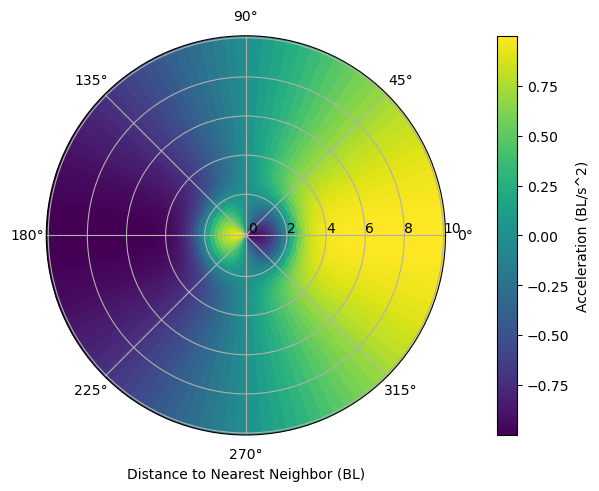

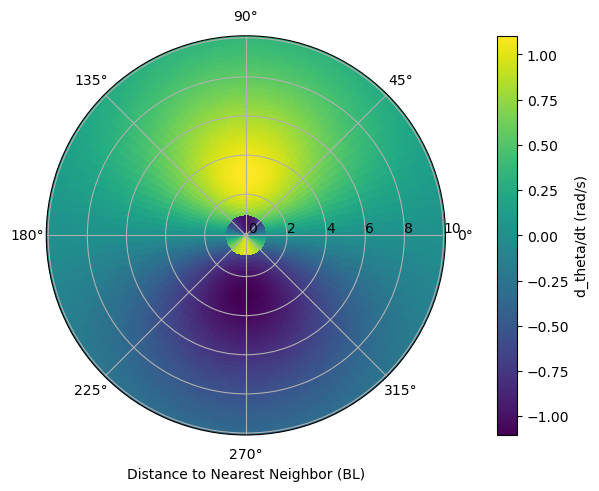

In [169]:
#plot the translational and angular acceleration functions:
r_values = np.linspace(0, 10, 50)  # Radial distances
theta_values = np.linspace(0, 2 * np.pi, 100) # Angles in radians
R, THETA = np.meshgrid(r_values, theta_values)

# Example 'z'data (e.g., a function of r and theta)
Zfar = np.cos(THETA) * np.tanh(R-2)
# Zclose = -np.cos(THETA)

# Zclose_masked = np.where(R <= 2, Zclose, np.nan)

# #consistent Acceleration values for heatmap
# Zmin = np.nanmin([Zfar.min(), Zclose.min()])
# Zmax = np.nanmax([Zfar.max(), Zclose.max()])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},constrained_layout=True)
heatmapfar = ax.pcolormesh(THETA, R, Zfar, cmap='viridis') 
# # Choose a colormap
# heatmapclose = ax.pcolormesh(THETA, R, Zclose_masked, cmap='viridis',vmin=Zmin, vmax=Zmax) # Choose a colormap

fig.colorbar(heatmapfar, ax=ax, label='Acceleration (BL/s^2)')
ax.set_rlabel_position(0) # Adjust position of radial labels
ax.set_xlabel("Distance to Nearest Neighbor (BL)")

# plt.savefig("acceleration.png")
plt.show()

#Angular acceleration heatmap * np.tanh(R/5)
AAfar = 1*np.sin(THETA)*R*np.exp(-(R/3))
AAclose = -1*np.sin(THETA)

# AAclose_masked = np.where(R <= 2, AAclose, np.nan)
AAclose_masked = np.where(R <= 1, AAclose, np.nan)

#consistent angular frequency values for heatmap
AAmin = np.nanmin([AAfar.min(), AAclose.min()])
AAmax = np.nanmax([AAfar.max(), AAclose.max()])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},constrained_layout=True)
heatmapfar = ax.pcolormesh(THETA, R, AAfar, cmap='viridis',vmin=AAmin, vmax=AAmax) # Choose a colormap
heatmapclose = ax.pcolormesh(THETA, R, AAclose_masked, cmap='viridis',vmin=AAmin, vmax=AAmax) # Choose a colormap

fig.colorbar(heatmapfar, ax=ax, label='d_theta/dt (rad/s)')
ax.set_rlabel_position(0) # Adjust position of radial labels
ax.set_xlabel("Distance to Nearest Neighbor (BL)")

# plt.savefig("Turning.png")
plt.show()

In [ ]:
#run this for all fish in one timestep

def updatefish(positions,radorientations,speeds,velocity, arenarange = 100, time = 0, timestep = 0.05, maxa = 2.0, maxdw = 1.0, erroracc = 0.05, errordw = 0.02, maxspd = 10, Wbias = 1, Abias = 1, forwardbias = True):
    copypositions = positions.copy()
    time += timestep
    t = timestep
    N = len(positions)
    maxspeed = maxspd
    maxcoord = arenarange/2
    for i in np.arange(N):
        #first find the nearest neighbor
        neighindex, neighdist, dist = findnearestneighbor(i, copypositions[i], copypositions)
        #find its dotproduct
        dotproduct, crossproduct = findangletoneighbor(radorientations[i],copypositions[i],copypositions[neighindex]) #simply cos(theta) and sin(theta)

        #error in acceleration
        Aerror = rng.uniform(-erroracc,erroracc)
        Dwerror = rng.uniform(-errordw,errordw)

        #bias in translational acceleration: if bias = 1 then they are equal
        lessmaxa = Abias*maxa
        if forwardbias == True: #more weight towards forward neighbors
            Aweight = lessmaxa if np.sign(dotproduct) < 0 else maxa
        else: #more weight towards neighbors behind
            Aweight = maxa if np.sign(dotproduct) < 0 else lessmaxa
        
        #calculate the accelerations based on the dotproduct and the distance to the neighbor
        motaccpositive = Aweight*dotproduct*np.tanh(neighdist - 2) + Aerror

        #Speed rule 1, attractve over R (2 body lengths) and repulsive under R. tanh(R-2) makes sure it is continuous 
        #and changes sign at R = 2
        if np.abs(speeds[i] + motaccpositive*t) <= maxspeed:
            speeds[i] = max(0, speeds[i] + motaccpositive*t)
        else: speeds[i] = min(maxspeed, speeds[i] + motaccpositive*t)
        
        #bias between forward and backward alignment
        lessmaxdw = Wbias*maxdw
        
        #1*np.sin(THETA)*R*1*np.sin(THETA)*R*np.exp(-(R/5)**2)/2
        if forwardbias == True: #more weight towards forward neighbors
            dwfar = maxdw*crossproduct*neighdist*np.exp(-(neighdist/3)) + Dwerror if np.sign(dotproduct) > 0 else lessmaxdw*crossproduct*neighdist*np.exp(-(neighdist/3)) + Dwerror
            dwnear = maxdw*crossproduct + Dwerror if np.sign(dotproduct) > 0 else lessmaxdw*crossproduct + Dwerror
        else: #more weight towards neighbors behind
            dwfar = lessmaxdw*crossproduct*neighdist*np.exp(-(neighdist/3)) + Dwerror if np.sign(dotproduct) > 0 else maxdw*crossproduct*neighdist*np.exp(-(neighdist/3)) + Dwerror
            dwnear = lessmaxdw*crossproduct + Dwerror if np.sign(dotproduct) > 0 else maxdw*crossproduct + Dwerror

        #orientation rule 1, turn towards nearest neighbor
        if neighdist >= 1: #radpersecond
            radorientations[i] = radorientations[i] + dwfar*t
        elif neighdist < 1: #radpersecond
            radorientations[i] = radorientations[i] -  dwnear*t

        #add repulsive force towards wall
        xwalldist, ywalldist = finddistancetonearestwall(copypositions[i], maxcoord)
        xwalldot, ywalldot, xwallcross, ywallcross = findangletowall(radorientations[i], copypositions[i], maxcoord)
        
        #make sure direction is correct
        xsign = np.sign(xwallcross)
        ysign = np.sign(ywallcross)
        
        #angular frequency for wall 
        dwwallx = maxdw*np.abs(xwalldot)*xsign + Dwerror
        dwwally = maxdw*np.abs(ywalldot)*ysign + Dwerror

        if np.abs(xwalldist) < 2 and xwalldot < 0:
            radorientations[i] += dwwallx * t

        if np.abs(ywalldist) < 2 and ywalldot < 0:   
            radorientations[i] += dwwally * t

        if xwalldot < 0 and ywalldot < 0 and np.sqrt(xwalldist**2+ywalldist**2) < 4:
            radorientations[i] += rng.choice([-3*np.pi/4,3*np.pi/4])

        #wall effect on acceleration. decelerate if dot product is negative, accelerate if positive
        awallx = maxa*xwalldot + Dwerror
        awally = maxa*ywalldot + Dwerror

        if np.abs(xwalldist) < 2:
            speeds[i] = max(0,speeds[i] + awallx * t)

        if np.abs(ywalldist) < 2:   
            speeds[i] = max(0,speeds[i] + awally * t)
        
        #update velocity
        velocity[i] = (speeds[i]*np.cos(radorientations[i]),speeds[i]*np.sin(radorientations[i]))

        #check position so that it is in bounds
        checknewposition = positions[i] + np.array(velocity[i])*t

        #if out of bounds, move fish to 1 BL from border and decelerate to 0, update velocity
        if np.abs(checknewposition[0]) > maxcoord or np.abs(checknewposition[1]) > maxcoord:
            if checknewposition[0] > maxcoord:
                positions[i][0] = maxcoord - 1
            if checknewposition[0] < -maxcoord:
                positions[i][0] = -maxcoord + 1
            if checknewposition[1] > maxcoord:
                positions[i][1] = maxcoord - 1
            if checknewposition[1] < -maxcoord:
                positions[i][1] = -maxcoord + 1
        
            speeds[i] = 0
            velocity[i] = (0,0)
        else: positions[i] = positions[i] + np.array(velocity[i])*t # update position according to x = x+vt for all fish
        
    return positions, radorientations, speeds, velocity, time

Plot and analysis

In [145]:
#plotting function

def plot(coords, radorientations, viewrange = (-50,50), title = '', fishmarker = fmarker, save = False):
    figurelength = viewrange[1]-viewrange[0]
    degmotangles = np.rad2deg(radorientations)

    xcoords, ycoords = zip(*coords)
    N = len(coords)
    colors = cm.rainbow(np.linspace(0, 1, N))
    
    fig, ax = plt.subplots()
    # scaling follows s = 160000/x^2 where x is the width of the coordinate

    for i in np.arange(N):
        rotmarker = fishmarker.transformed(mpl.transforms.Affine2D().rotate_deg(degmotangles[i]))
        ax.scatter(xcoords[i],ycoords[i], marker = rotmarker, s = 160000/figurelength**2, color = colors[i])

    #plot view range
    ax.set_xlim(viewrange[0],viewrange[1])
    ax.set_ylim(viewrange[0],viewrange[1])

    ax.set_title(title)
    ax.grid()

    if save == True:
        plt.savefig("SimFigure.png")
        
    plt.show()


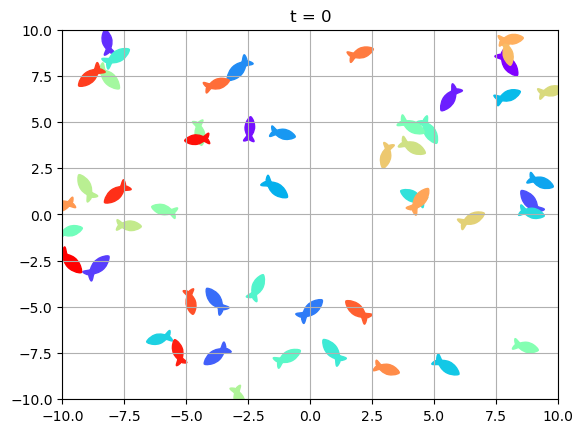

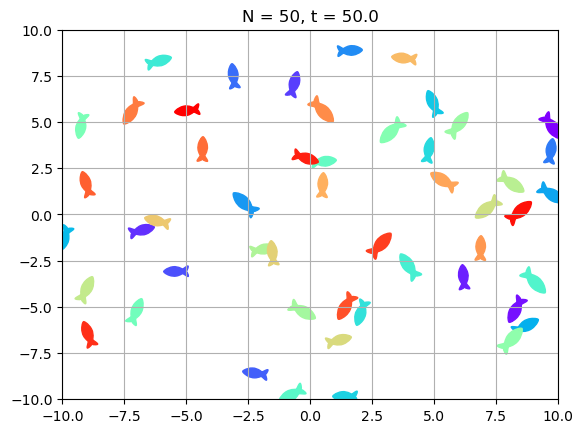

In [193]:
numiterations = 1000
poolrange = 20 #poolrange/2 is the length of each side
initcoordmax = 10 #essentially initial density
numfish = 50
inittime = 0
positionarray = []
speedarray = []

pos, motorientations, motspeeds, motvelocity = initialize(numfish, initcoordmax)
plot(pos, motorientations, viewrange = (-poolrange/2,poolrange/2), title = 't = 0')

#run the function numiteration times and keep track of positions
for i in np.arange(numiterations):
    pos, motorientations, motspeeds, motvelocity, inittime = updatefish(pos, motorientations, motspeeds, motvelocity, time = inittime, arenarange = poolrange)
    speedarray.append(copy.deepcopy(motspeeds))
    positionarray.append(copy.deepcopy(pos))

plot(pos, motorientations, viewrange = (-poolrange/2,poolrange/2), title = f'N = {numfish}, t = {inittime:.1f}', save = True)

### Trajectory Plot

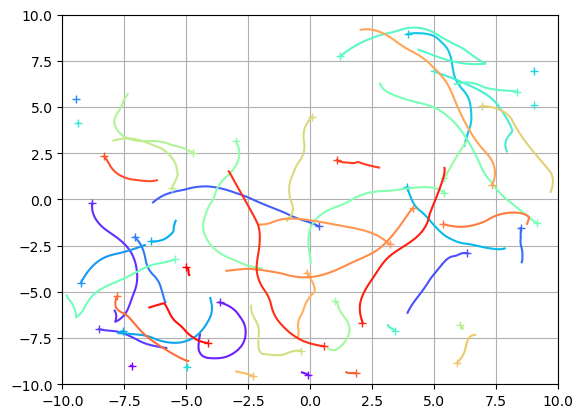

In [192]:
#trajectory plot
fig, ax = plt.subplots()

plotmaxcoord = poolrange/2
trajlength = 100

colors = cm.rainbow(np.linspace(0, 1, numfish))

for n in np.arange(numfish):
    coordinates = []
    for i in np.arange(numiterations):
        coordinates.append(positionarray[i][n])
    fishcoordsx, fishcoordsy = zip(*coordinates)

    recent_x = fishcoordsx[-trajlength:]
    recent_y = fishcoordsy[-trajlength:] 

    ax.plot(recent_x, recent_y, color=colors[n])
    ax.plot(recent_x[-1], recent_y[-1], marker='+', color=colors[n])

ax.set_xlim(-plotmaxcoord,plotmaxcoord)
ax.set_ylim(-plotmaxcoord,plotmaxcoord)
ax.grid()
plt.savefig('traj.png')
plt.show()


In [185]:
#final velocity plot function
def plotvel(coords, radorientations, speeds, viewrange = (-50,50), title = ''):
    markerstyle = MarkerStyle(marker= '_')

    figurelength = viewrange[1]-viewrange[0]
    degmotangles = np.rad2deg(radorientations)

    xcoords, ycoords = zip(*coords)
    N = len(coords)
    
    fig, ax = plt.subplots()

    # scaling of the length is proportional to the velocity
    for i in np.arange(N):
        rotmarker = markerstyle.transformed(mpl.transforms.Affine2D().rotate_deg(degmotangles[i]))
        scale = speeds[i]
        ax.scatter(xcoords[i],ycoords[i], marker = rotmarker, s = 500*scale)

    #plot view range
    ax.set_xlim(viewrange[0],viewrange[1])
    ax.set_ylim(viewrange[0],viewrange[1])

    ax.set_title(title)
    ax.grid()

    plt.show()

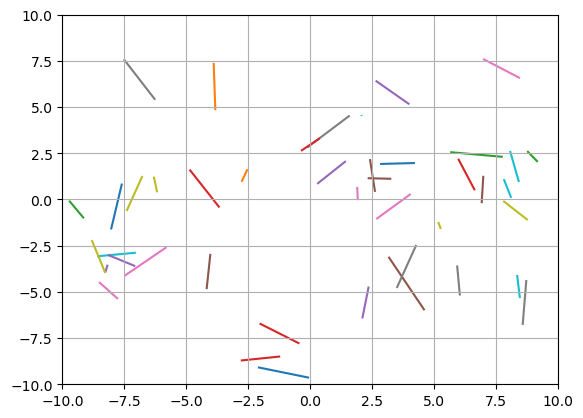

In [188]:
#final velocity plot:
plotvel(pos, motorientations, motspeeds, viewrange = (-plotmaxcoord,plotmaxcoord))

0.9405621927364478


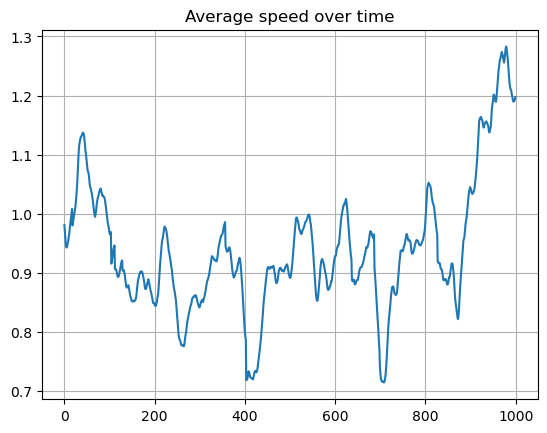

In [189]:
#plot changes in speed:
speedavg = [np.mean(array) for array in speedarray]
plt.plot(np.arange(len(speedavg)),speedavg)
plt.title('Average speed over time')
meanspeedaverage = np.mean(speedavg)
print(meanspeedaverage)
plt.grid()

speedsforeachfish = []
for i in np.arange(numfish):
    speedonefish = [array[i] for array in speedarray]
    speedsforeachfish.append(speedonefish)

# Analysis


Change the parameters, and calculate the average polarization, cohesion, and milling


In [70]:
#center of mass

def findCM(positionarray):
    N = len(positionarray)
    sum = np.sum(positionarray, axis = 0)
    centerofmass = sum/N
    return centerofmass

def findVCM(velocityarray):
    N = len(velocityarray)
    sum = np.sum(velocityarray, axis = 0)
    Vcm = sum/N
    return Vcm

def findP(radorientations):
    N = len(radorientations)
    #normalize the velocities => basically [cos(angle),sin(angle)]
    normvel = [np.array([np.cos(i),np.sin(i)]) for i in radorientations]
    #add them up
    NormVsum = np.sum(normvel, axis = 0)
    #take the magnitude of the sum
    mag = np.linalg.norm(NormVsum)
    #divide by N
    P = mag/N
    return P

#also known as dispersion
def findCohesion(positionarray):
    N = len(positionarray)
    cm = findCM(positionarray)
    distfromcm = [np.linalg.norm(coords-cm) for coords in positionarray] 
    distsquared = np.square(distfromcm)
    distsqsum = np.sum(distsquared, axis = 0)
    cohesion = np.sqrt(distsqsum/N)
    return cohesion

def findMilling(positionarray, radorientations):
    N = len(positionarray)
    normvel = [np.array([np.cos(i),np.sin(i)]) for i in radorientations]
    normpos = [position/np.linalg.norm(position) for position in positionarray]
    crossp = [cross2d(normpos[i], normvel[i]) for i in np.arange(N)]
    sumofcrossp = np.sum(crossp, axis = 0)
    milling = np.abs(sumofcrossp)/N
    return milling



Perform analysis for numfish = 5, 10, 30

we need to check if they result in an equilibriated state
let's start with n = 5

- Keep numiterations = 1000
- poolrange = 20
- initcoordmax = 10 

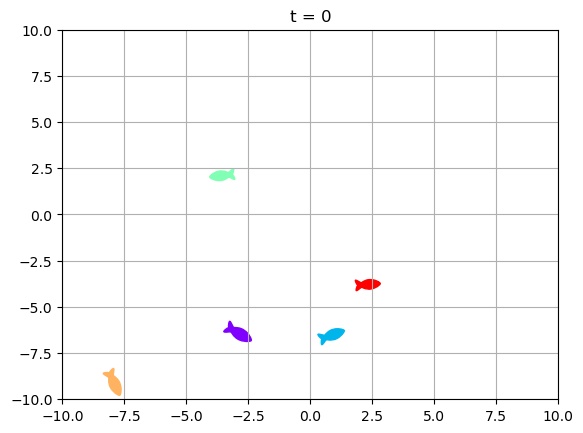

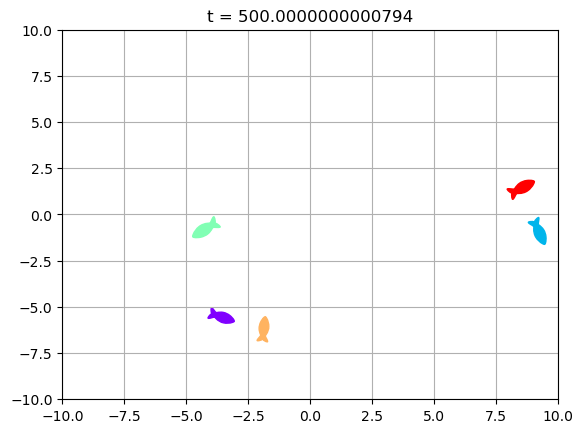

In [201]:
# N = 5

numiterations = 10000
poolrange = 20 #poolrange/2 is the length of each side
initcoordmax = 10 #essentially initial density
numfish = 5
inittime = 0

#data arrays
positionarray = []
speedarray = []
cmpositionarray = []
cmvelocityarray = []
Parray = []
Carray = []
Marray = []

pos, motorientations, motspeeds, motvelocity = initialize(numfish, initcoordmax)
#initial plot
plot(pos, motorientations, viewrange = (-poolrange/2,poolrange/2), title = 't = 0')

#run the function numiteration times and keep track of positions
for i in np.arange(numiterations):
    pos, motorientations, motspeeds, motvelocity, inittime = updatefish(pos, motorientations, motspeeds, motvelocity, time = inittime, arenarange = poolrange)

    speedarray.append(copy.deepcopy(motspeeds))
    positionarray.append(copy.deepcopy(pos))

    cmposition = findCM(pos)
    cmpositionarray.append(copy.deepcopy(cmposition))

    cmvelocity = findVCM(motvelocity)
    cmvelocityarray.append(copy.deepcopy(cmvelocity))

    Polarization = findP(motorientations)
    Parray.append(copy.deepcopy(Polarization))

    Cohesion = findCohesion(pos)
    Carray.append(copy.deepcopy(Cohesion))

    Milling = findMilling(pos, motorientations)
    Marray.append(copy.deepcopy(Milling))

plot(pos, motorientations, viewrange = (-poolrange/2,poolrange/2), title = f't = {inittime}')

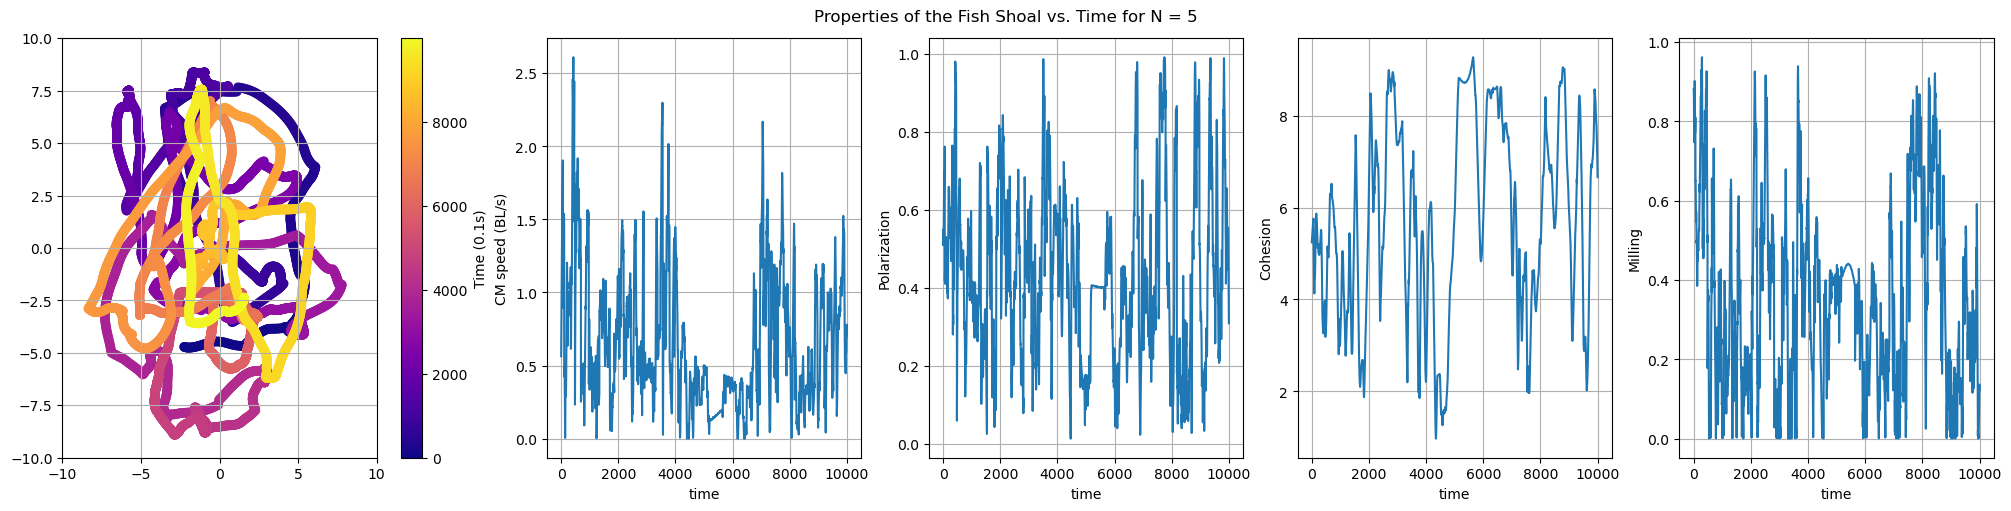

In [202]:
# numiterations = 1000
# poolrange = 20 #poolrange/2 is the length of each side
# initcoordmax = 10 #essentially initial density
# numfish = 5
# inittime = 0

fig, axs = plt.subplots(1,5,constrained_layout = True, figsize = (20,5))
fig.suptitle('Properties of the Fish Shoal vs. Time for N = 5')

time = np.arange(numiterations)

#plot center of mass over time
cmxcoords, cmycoords = zip(*cmpositionarray)
c_values = np.arange(len(cmxcoords))

sc = axs[0].scatter(cmxcoords, cmycoords, c = c_values, cmap = 'plasma')
axs[0].set_xlim(-poolrange/2,poolrange/2)
axs[0].set_ylim(-poolrange/2,poolrange/2)
axs[0].grid()
cbar = plt.colorbar(sc, ax=axs[0])
cbar.set_label("Time (0.1s)")

#plot center of mass speed over time
cmspeed = [np.linalg.norm(velocity) for velocity in cmvelocityarray]

axs[1].plot(time, cmspeed)
axs[1].grid()
axs[1].set_xlabel('time')
axs[1].set_ylabel('CM speed (BL/s)')


# plot polarization over time Parray = []
axs[2].plot(time, Parray)
axs[2].grid()
axs[2].set_xlabel('time')
axs[2].set_ylabel('Polarization')


# Carray = []
axs[3].plot(time, Carray)
axs[3].grid()
axs[3].set_xlabel('time')
axs[3].set_ylabel('Cohesion')

# Marray = []
axs[4].plot(time, Marray)
axs[4].grid()
axs[4].set_xlabel('time')
axs[4].set_ylabel('Milling')
plt.show()

Conclusion, we don't see equilibrium over time

In [205]:
#Now run it many times and find the average properties at t = 1000
numsim = 50

totalcmarray = []
totalcmVarray = []
totalParray = []
totalCarray = []
totalMarray = []

for i in np.arange(numsim):
    numiterations = 1000
    poolrange = 20 #poolrange/2 is the length of each side
    initcoordmax = 10 #essentially initial density
    numfish = 5
    inittime = 0

    pos, motorientations, motspeeds, motvelocity = initialize(numfish, initcoordmax)
    
    #run the simulation numiteration times
    for i in np.arange(numiterations):
        pos, motorientations, motspeeds, motvelocity, inittime = updatefish(pos, motorientations, motspeeds, motvelocity, time = inittime, arenarange = poolrange, )

    #calculate the final properties
    cmposition = findCM(pos)
    totalcmarray.append(copy.deepcopy(cmposition))

    cmvelocity = findVCM(motvelocity)
    totalcmVarray.append(copy.deepcopy(cmvelocity))

    Polarization = findP(motorientations)
    totalParray.append(copy.deepcopy(Polarization))

    Cohesion = findCohesion(pos)
    totalCarray.append(copy.deepcopy(Cohesion))

    Milling = findMilling(pos, motorientations)
    totalMarray.append(copy.deepcopy(Milling))

0.464619036207756
5.581469564705202
0.38668537273413306


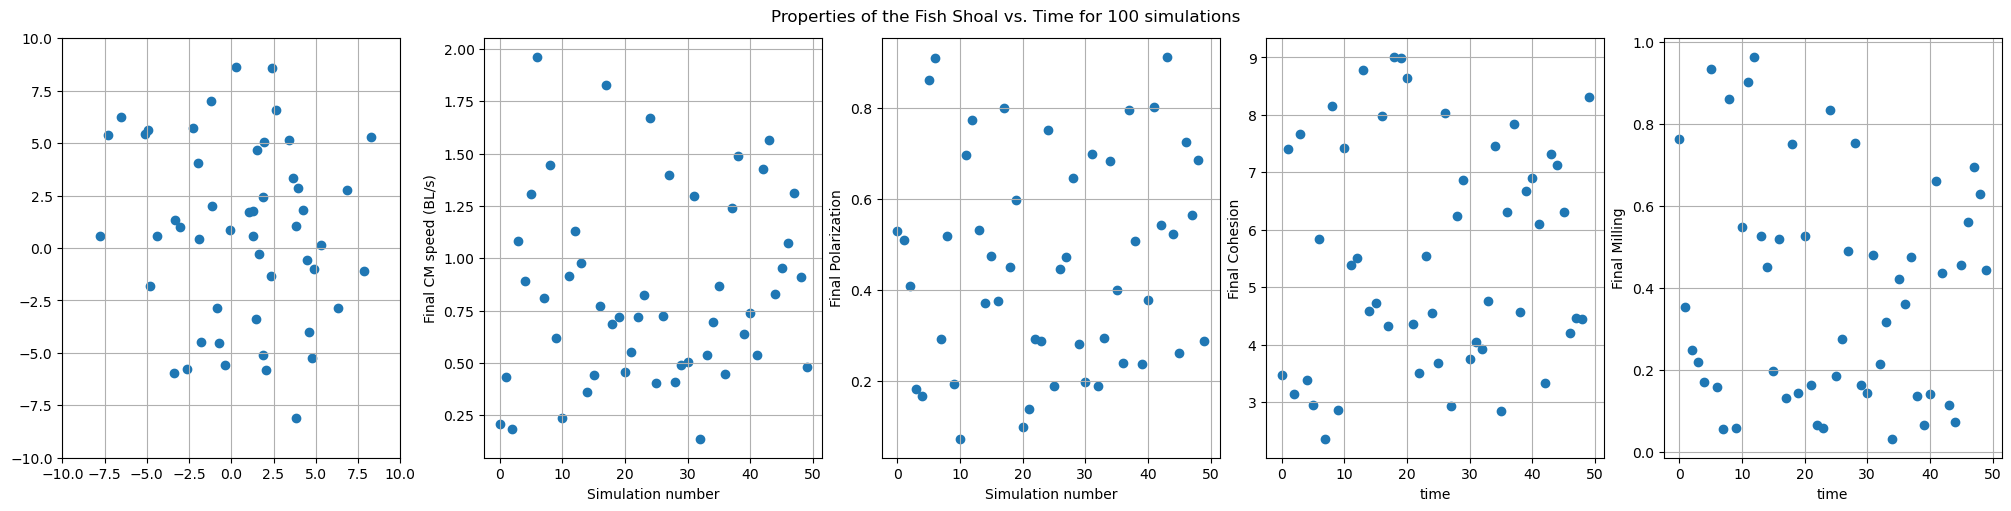

In [206]:
#plot each for N = 5

# numiterations = 1000
# poolrange = 40 #poolrange/2 is the length of each side
# initcoordmax = 20 #essentially initial density
# numfish = 5
# inittime = 0

# totalcmarray = []
# totalcmVarray = []
# totalParray = []
# totalCarray = []
# totalMarray = []

fig, axs = plt.subplots(1,5,constrained_layout = True, figsize = (20,5))
fig.suptitle('Properties of the Fish Shoal vs. Time for 100 simulations')

Nsim = np.arange(numsim)

#plot center of masses
cmxcoords, cmycoords = zip(*totalcmarray)

axs[0].scatter(cmxcoords, cmycoords)
axs[0].set_xlim(-poolrange/2,poolrange/2)
axs[0].set_ylim(-poolrange/2,poolrange/2)
axs[0].grid()

#plot center of mass speeds
cmspeed = [np.linalg.norm(velocity) for velocity in totalcmVarray]

axs[1].scatter(Nsim, cmspeed)
axs[1].grid()
axs[1].set_xlabel('Simulation number')
axs[1].set_ylabel('Final CM speed (BL/s)')

# plot polarization over time Parray = []
axs[2].scatter(Nsim, totalParray)
print(np.mean(totalParray))
axs[2].grid()
axs[2].set_xlabel('Simulation number')
axs[2].set_ylabel('Final Polarization')


# Carray = []
axs[3].scatter(Nsim, totalCarray)
print(np.mean(totalCarray))
axs[3].grid()
axs[3].set_xlabel('time')
axs[3].set_ylabel('Final Cohesion')

# Marray = []
axs[4].scatter(Nsim, totalMarray)
print(np.mean(totalMarray))
axs[4].grid()
axs[4].set_xlabel('time')
axs[4].set_ylabel('Final Milling')

plt.show()

Polarization around 0.5, Cohesion around 5, Milling around 0.35

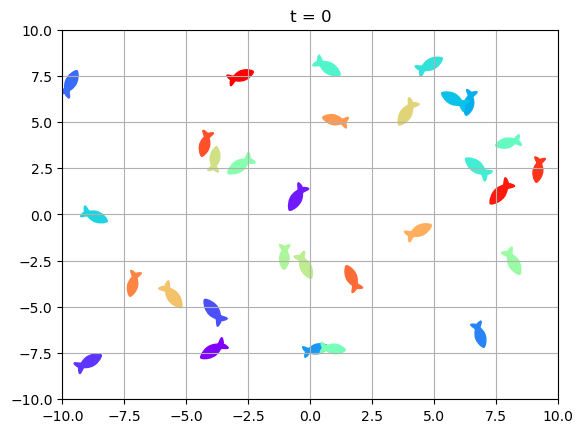

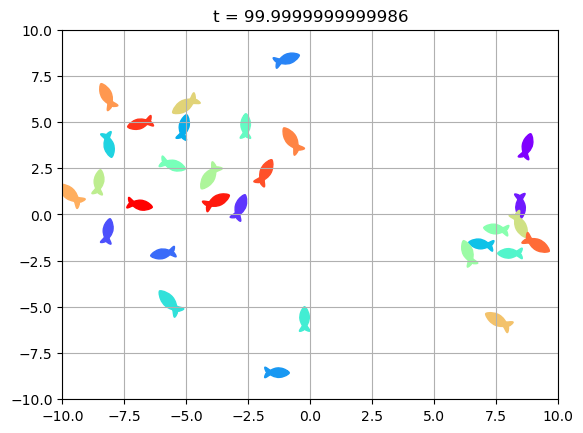

In [139]:
# N = 30
numiterations = 1000
poolrange = 20 #poolrange/2 is the length of each side
initcoordmax = 10 #essentially initial density
numfish = 30
inittime = 0

#data arrays
positionarray = []
speedarray = []
cmpositionarray = []
cmvelocityarray = []
Parray = []
Carray = []
Marray = []

pos, motorientations, motspeeds, motvelocity = initialize(numfish, initcoordmax)
#initial plot
plot(pos, motorientations, viewrange = (-poolrange/2,poolrange/2), title = 't = 0')

#run the function numiteration times and keep track of positions
for i in np.arange(numiterations):
    pos, motorientations, motspeeds, motvelocity, inittime = updatefish(pos, motorientations, motspeeds, motvelocity, time = inittime, arenarange = poolrange)

    speedarray.append(copy.deepcopy(motspeeds))
    positionarray.append(copy.deepcopy(pos))

    cmposition = findCM(pos)
    cmpositionarray.append(copy.deepcopy(cmposition))

    cmvelocity = findVCM(motvelocity)
    cmvelocityarray.append(copy.deepcopy(cmvelocity))

    Polarization = findP(motorientations)
    Parray.append(copy.deepcopy(Polarization))

    Cohesion = findCohesion(pos)
    Carray.append(copy.deepcopy(Cohesion))

    Milling = findMilling(pos, motorientations)
    Marray.append(copy.deepcopy(Milling))

plot(pos, motorientations, viewrange = (-poolrange/2,poolrange/2), title = f't = {inittime}')

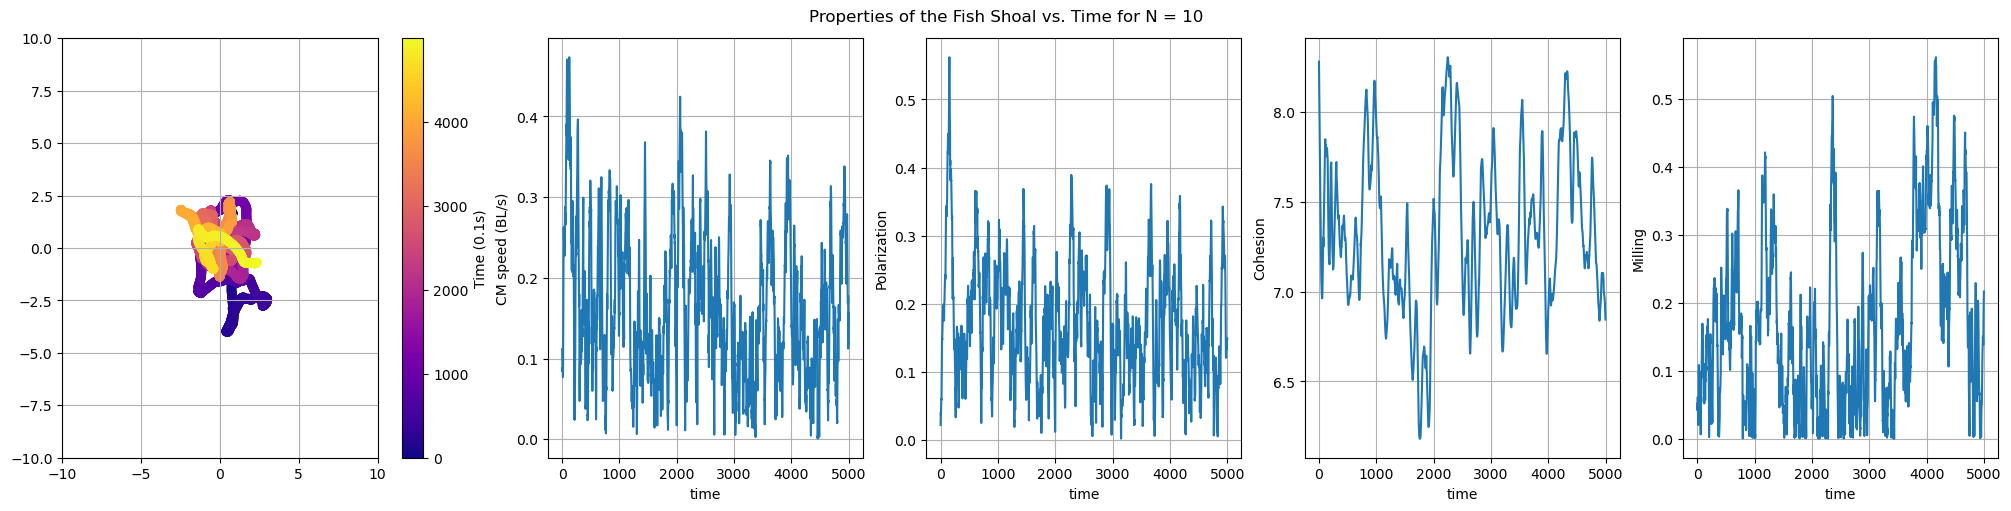

In [135]:
#N = 30 

# numiterations = 1000
# poolrange = 20 #poolrange/2 is the length of each side
# initcoordmax = 10 #essentially initial density
# numfish = 5
# inittime = 0

fig, axs = plt.subplots(1,5,constrained_layout = True, figsize = (20,5))
fig.suptitle('Properties of the Fish Shoal vs. Time for N = 10')

time = np.arange(numiterations)

#plot center of mass over time
cmxcoords, cmycoords = zip(*cmpositionarray)
c_values = np.arange(len(cmxcoords))

sc = axs[0].scatter(cmxcoords, cmycoords, c = c_values, cmap = 'plasma')
axs[0].set_xlim(-poolrange/2,poolrange/2)
axs[0].set_ylim(-poolrange/2,poolrange/2)
axs[0].grid()
cbar = plt.colorbar(sc, ax=axs[0])
cbar.set_label("Time (0.1s)")

#plot center of mass speed over time
cmspeed = [np.linalg.norm(velocity) for velocity in cmvelocityarray]

axs[1].plot(time, cmspeed)
axs[1].grid()
axs[1].set_xlabel('time')
axs[1].set_ylabel('CM speed (BL/s)')

# plot polarization over time Parray = []
axs[2].plot(time, Parray)
axs[2].grid()
axs[2].set_xlabel('time')
axs[2].set_ylabel('Polarization')

# Carray = []
axs[3].plot(time, Carray)
axs[3].grid()
axs[3].set_xlabel('time')
axs[3].set_ylabel('Cohesion')

# Marray = []
axs[4].plot(time, Marray)
axs[4].grid()
axs[4].set_xlabel('time')
axs[4].set_ylabel('Milling')

plt.show()

In [136]:
#Now run it many times and find the average properties at t = 5000 start counting at 500
#N = 50
numsim = 10

totalcmarray = []
totalcmVarray = []
totalParray = []
totalCarray = []
totalMarray = []

for i in np.arange(numsim):
    numiterations = 2000
    poolrange = 20 #poolrange/2 is the length of each side
    initcoordmax = 10 #essentially initial density
    numfish = 30
    inittime = 0

    pos, motorientations, motspeeds, motvelocity = initialize(numfish, initcoordmax)
    
    #run the simulation numiteration times
    for i in np.arange(numiterations):
        pos, motorientations, motspeeds, motvelocity, inittime = updatefish(pos, motorientations, motspeeds, motvelocity, time = inittime, arenarange = poolrange, )

    #calculate the final properties
    cmposition = findCM(pos)
    totalcmarray.append(copy.deepcopy(cmposition))

    cmvelocity = findVCM(motvelocity)
    totalcmVarray.append(copy.deepcopy(cmvelocity))

    Polarization = findP(motorientations)
    totalParray.append(copy.deepcopy(Polarization))

    Cohesion = findCohesion(pos)
    totalCarray.append(copy.deepcopy(Cohesion))

    Milling = findMilling(pos, motorientations)
    totalMarray.append(copy.deepcopy(Milling))

Mean Polarization: 0.1794817671226728
Mean Cohesion: 7.361554637014649
Mean Milling: 0.20701975618453844


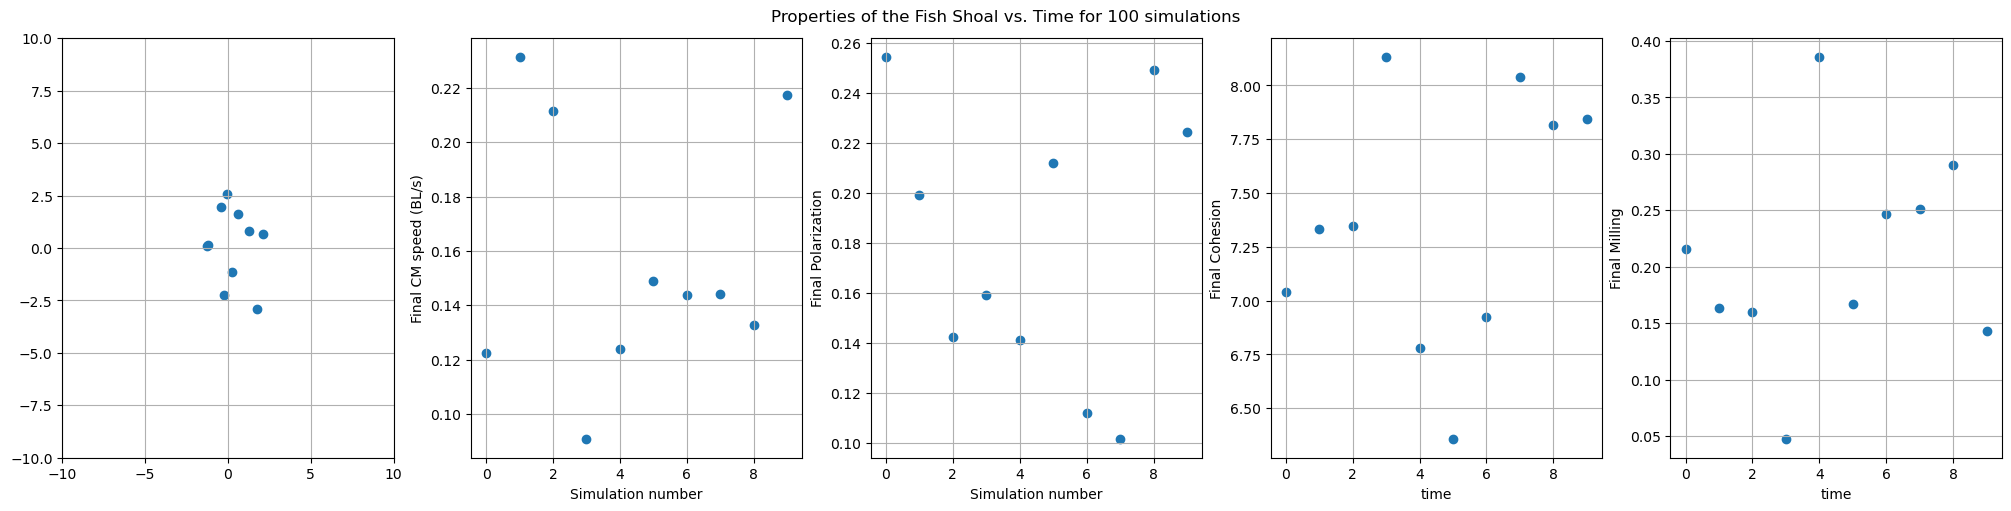

In [138]:
#plot each for N = 30

# numiterations = 1000
# poolrange = 20 #poolrange/2 is the length of each side
# initcoordmax = 10 #essentially initial density
# numfish = 5
# inittime = 0

# totalcmarray = []
# totalcmVarray = []
# totalParray = []
# totalCarray = []
# totalMarray = []

fig, axs = plt.subplots(1,5,constrained_layout = True, figsize = (20,5))
fig.suptitle('Properties of the Fish Shoal vs. Time for 100 simulations')

Nsim = np.arange(len(totalcmarray[-1500:]))

#plot center of masses
cmxcoords, cmycoords = zip(*totalcmarray)

axs[0].scatter(cmxcoords, cmycoords)
axs[0].set_xlim(-poolrange/2,poolrange/2)
axs[0].set_ylim(-poolrange/2,poolrange/2)
axs[0].grid()

#plot center of mass speeds
cmspeed = [np.linalg.norm(velocity) for velocity in totalcmVarray]

axs[1].scatter(Nsim, cmspeed[-1500:])
axs[1].grid()
axs[1].set_xlabel('Simulation number')
axs[1].set_ylabel('Final CM speed (BL/s)')

# plot polarization over time Parray = []
axs[2].scatter(Nsim, totalParray[-1500:])
print(f'Mean Polarization: {np.mean(totalParray)}')
axs[2].grid()
axs[2].set_xlabel('Simulation number')
axs[2].set_ylabel('Final Polarization')


# Carray = []
axs[3].scatter(Nsim, totalCarray[-1500:])
print(f'Mean Cohesion: {np.mean(totalCarray)}')
axs[3].grid()
axs[3].set_xlabel('time')
axs[3].set_ylabel('Final Cohesion')

# Marray = []
axs[4].scatter(Nsim, totalMarray[-1500:])
print(f'Mean Milling: {np.mean(totalMarray)}')
axs[4].grid()
axs[4].set_xlabel('time')
axs[4].set_ylabel('Final Milling')

plt.show()

We notice that the average polarization and milling both decrease with N, while cohesion increases. 

Find relation with error. For each N = 5,10,30, run the experiment 100 times with acceleration error = 0, 0.1, 0.2, 0.3, 0.4, 0.5 and check mean polarization, cohesion, milling to try to observe phase transition.

In [ ]:
#Check the P,C,M for various error for N = 5,10,30 to see if anything happens
N = [5,10,30]
Aerrors = np.linspace(0,0.5,10)

meanParrays = [[],[],[]]
meanCarrays = [[],[],[]]
meanMarrays = [[],[],[]]

for index in np.arange(len(N)):
    for A in Aerrors: 
        #Run it many times and find the average properties at t = 1000
        numsim = 10
        totalParray = []
        totalCarray = []
        totalMarray = []

        for n in np.arange(numsim):
            numiterations = 1000
            poolrange = 20 #poolrange/2 is the length of each side
            initcoordmax = 10 #essentially initial density
            numfish = N[index]
            inittime = 0

            pos, motorientations, motspeeds, motvelocity = initialize(numfish, initcoordmax)
            
            #run the simulation numiteration times
            for i in np.arange(numiterations):
                pos, motorientations, motspeeds, motvelocity, inittime = updatefish(pos, motorientations, motspeeds, motvelocity, time = inittime, arenarange = poolrange, erroracc = A)

            Polarization = findP(motorientations)
            totalParray.append(copy.deepcopy(Polarization))

            Cohesion = findCohesion(pos)
            totalCarray.append(copy.deepcopy(Cohesion))

            Milling = findMilling(pos, motorientations)
            totalMarray.append(copy.deepcopy(Milling))
        
        meanP = np.mean(totalParray)
        meanC = np.mean(totalCarray)
        meanM = np.mean(totalMarray)

        meanParrays[index].append(meanP)
        meanCarrays[index].append(meanC)
        meanMarrays[index].append(meanM)

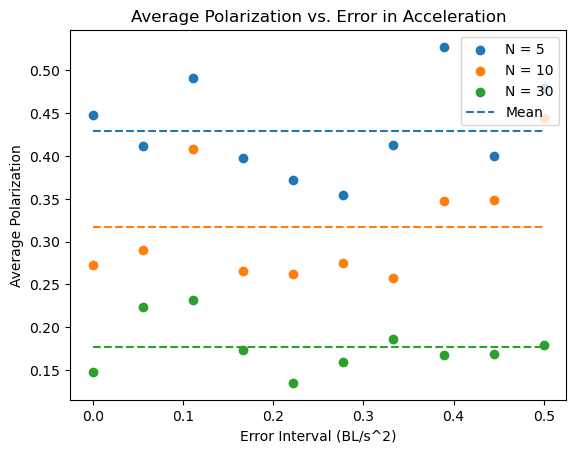

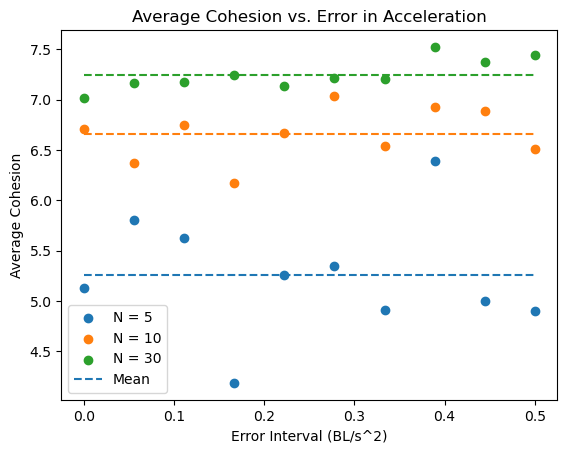

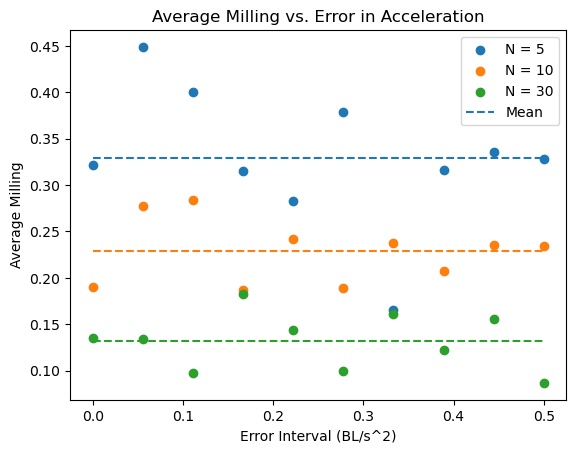

In [189]:
#polarization plot
plt.scatter(Aerrors,meanParrays[0], label = 'N = 5')
plt.scatter(Aerrors,meanParrays[1], label = 'N = 10')
plt.scatter(Aerrors,meanParrays[2], label = 'N = 30')
plt.hlines(y = [np.mean(meanParrays[0]),np.mean(meanParrays[1]),np.mean(meanParrays[2])], xmin = 0, xmax = 0.5,  linestyles='--', label='Mean', colors = ['C0', 'C1', 'C2'])
plt.title('Average Polarization vs. Error in Acceleration')
plt.xlabel('Error Interval (BL/s^2)')
plt.ylabel('Average Polarization')
plt.legend(loc = 'upper right')
plt.show()

#cohesion plot
plt.scatter(Aerrors,meanCarrays[0], label = 'N = 5')
plt.scatter(Aerrors,meanCarrays[1], label = 'N = 10')
plt.scatter(Aerrors,meanCarrays[2], label = 'N = 30')
plt.hlines(y = [np.mean(meanCarrays[0]),np.mean(meanCarrays[1]),np.mean(meanCarrays[2])], xmin = 0, xmax = 0.5,  linestyles='--', label='Mean', colors = ['C0', 'C1', 'C2'])
plt.title('Average Cohesion vs. Error in Acceleration')
plt.xlabel('Error Interval (BL/s^2)')
plt.ylabel('Average Cohesion')
plt.legend()
plt.show()

#Milling plot
plt.scatter(Aerrors,meanMarrays[0], label = 'N = 5')
plt.scatter(Aerrors,meanMarrays[1], label = 'N = 10')
plt.scatter(Aerrors,meanMarrays[2], label = 'N = 30')
plt.hlines(y = [np.mean(meanMarrays[0]),np.mean(meanMarrays[1]),np.mean(meanMarrays[2])], xmin = 0, xmax = 0.5,  linestyles='--', label='Mean', colors = ['C0', 'C1', 'C2'])
plt.title('Average Milling vs. Error in Acceleration')
plt.xlabel('Error Interval (BL/s^2)')
plt.ylabel('Average Milling')
plt.legend()
plt.show()

Conclusion: no real dependency with error in acceleration. However, there is a dependency between the size (or density) and the average P,C,and M, that is consistent across all error intervals. 

Find relation with angular error. For each N = 5,10,50, run the experiment 100 times with angular frequency error = 0.1, 0.1, 0.2, 0.3, 0.4, 0.5 and check mean polarization, cohesion, milling to try to observe phase transition.

In [214]:
#Do it for N = 5,10,30 to see if anything happens
N = [5,10,30]
Werrors = np.linspace(0,0.8,10)

WmeanParrays = [[],[],[]]
WmeanCarrays = [[],[],[]]
WmeanMarrays = [[],[],[]]

for index in np.arange(len(N)):
    for W in Werrors: 
        #Run it many times and find the average properties at t = 1000
        numsim = 10
        totalParray = []
        totalCarray = []
        totalMarray = []

        for n in np.arange(numsim):
            numiterations = 1000
            poolrange = 20 #poolrange/2 is the length of each side
            initcoordmax = 10 #essentially initial density
            numfish = N[index]
            inittime = 0

            pos, motorientations, motspeeds, motvelocity = initialize(numfish, initcoordmax)
            
            #run the simulation numiteration times
            for i in np.arange(numiterations):
                pos, motorientations, motspeeds, motvelocity, inittime = updatefish(pos, motorientations, motspeeds, motvelocity, time = inittime, arenarange = poolrange, errordw = W)

            Polarization = findP(motorientations)
            totalParray.append(copy.deepcopy(Polarization))

            Cohesion = findCohesion(pos)
            totalCarray.append(copy.deepcopy(Cohesion))

            Milling = findMilling(pos, motorientations)
            totalMarray.append(copy.deepcopy(Milling))
        
        meanP = np.mean(totalParray)
        meanC = np.mean(totalCarray)
        meanM = np.mean(totalMarray)

        WmeanParrays[index].append(meanP)
        WmeanCarrays[index].append(meanC)
        WmeanMarrays[index].append(meanM)

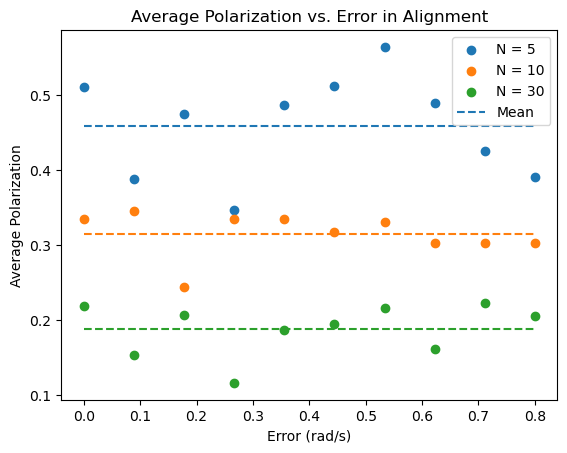

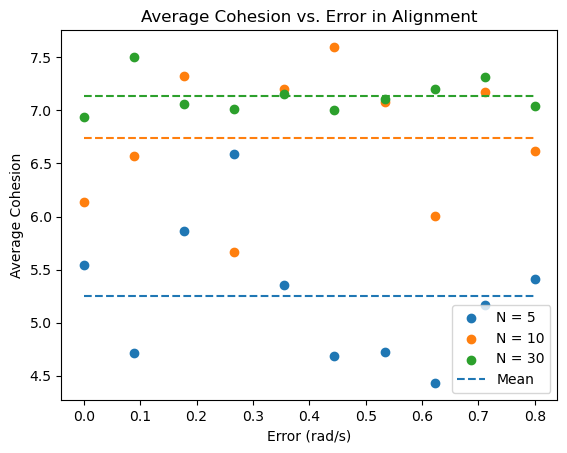

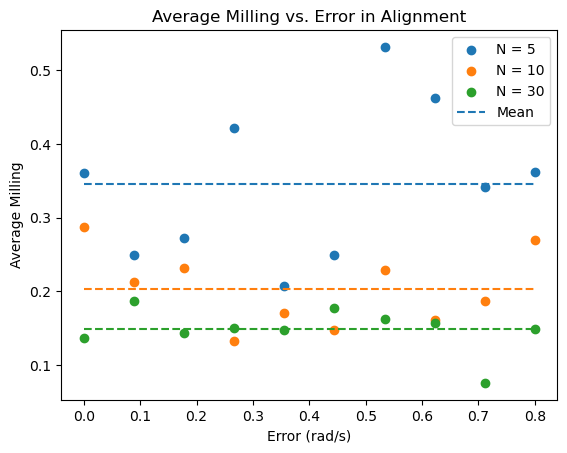

In [215]:
#plot the angular error vs P,C,M
#polarization plot
plt.scatter(Werrors,WmeanParrays[0], label = 'N = 5')
plt.scatter(Werrors,WmeanParrays[1], label = 'N = 10')
plt.scatter(Werrors,WmeanParrays[2], label = 'N = 30')
plt.hlines(y = [np.mean(WmeanParrays[0]),np.mean(WmeanParrays[1]),np.mean(WmeanParrays[2])], xmin = 0, xmax = 0.8,  linestyles='--', label='Mean', colors = ['C0', 'C1', 'C2'])
plt.title('Average Polarization vs. Error in Alignment')
plt.xlabel('Error (rad/s)')
plt.ylabel('Average Polarization')
plt.legend(loc = 'upper right')
plt.show()

#cohesion plot
plt.scatter(Werrors,WmeanCarrays[0], label = 'N = 5')
plt.scatter(Werrors,WmeanCarrays[1], label = 'N = 10')
plt.scatter(Werrors,WmeanCarrays[2], label = 'N = 30')
plt.hlines(y = [np.mean(WmeanCarrays[0]),np.mean(WmeanCarrays[1]),np.mean(WmeanCarrays[2])], xmin = 0, xmax = 0.8,  linestyles='--', label='Mean', colors = ['C0', 'C1', 'C2'])
plt.title('Average Cohesion vs. Error in Alignment')
plt.xlabel('Error (rad/s)')
plt.ylabel('Average Cohesion')
plt.legend()
plt.show()

#Milling plot
plt.scatter(Werrors,WmeanMarrays[0], label = 'N = 5')
plt.scatter(Werrors,WmeanMarrays[1], label = 'N = 10')
plt.scatter(Werrors,WmeanMarrays[2], label = 'N = 30')
plt.hlines(y = [np.mean(WmeanMarrays[0]),np.mean(WmeanMarrays[1]),np.mean(WmeanMarrays[2])], xmin = 0, xmax = 0.8,  linestyles='--', label='Mean', colors = ['C0', 'C1', 'C2'])
plt.title('Average Milling vs. Error in Alignment')
plt.xlabel('Error (rad/s)')
plt.ylabel('Average Milling')
plt.legend()
plt.show()

Observations: no clear relatioship between errors and average P,C,M. Although the milling increases at very small error for N=5, this is likely due to the wall repulsion. Further, the cohesion seems to fluctuate largely for small N as error increases. There might be something between 0.2 and 0.3 that I could check 

### Analyzing the effect of Max A on P,C,M

In [192]:
#Do it for N = 5,10,30 to see if anything happens
N = [5,10,30]
maxas = np.linspace(0.1,2.0,10)

MaxAmeanParrays = [[],[],[]]
MaxAmeanCarrays = [[],[],[]]
MaxAmeanMarrays = [[],[],[]]

for index in np.arange(len(N)):
    for a in maxas: 
        #Run it many times and find the average properties at t = 1000
        numsim = 10
        totalParray = []
        totalCarray = []
        totalMarray = []

        for n in np.arange(numsim):
            numiterations = 1000
            poolrange = 20 #poolrange/2 is the length of each side
            initcoordmax = 10 #essentially initial density
            numfish = N[index]
            inittime = 0

            pos, motorientations, motspeeds, motvelocity = initialize(numfish, initcoordmax)
            
            #run the simulation numiteration times
            for i in np.arange(numiterations):
                pos, motorientations, motspeeds, motvelocity, inittime = updatefish(pos, motorientations, motspeeds, motvelocity, time = inittime, arenarange = poolrange, maxa = a)

            Polarization = findP(motorientations)
            totalParray.append(copy.deepcopy(Polarization))

            Cohesion = findCohesion(pos)
            totalCarray.append(copy.deepcopy(Cohesion))

            Milling = findMilling(pos, motorientations)
            totalMarray.append(copy.deepcopy(Milling))
        
        meanP = np.mean(totalParray)
        meanC = np.mean(totalCarray)
        meanM = np.mean(totalMarray)

        MaxAmeanParrays[index].append(meanP)
        MaxAmeanCarrays[index].append(meanC)
        MaxAmeanMarrays[index].append(meanM)

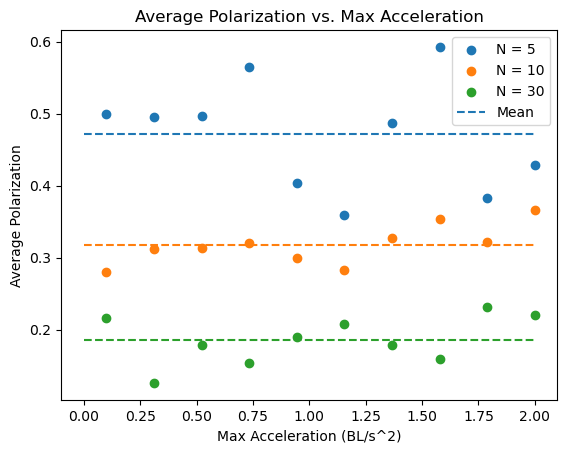

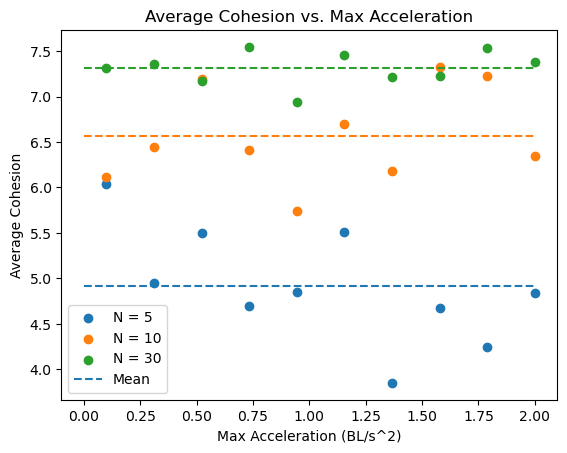

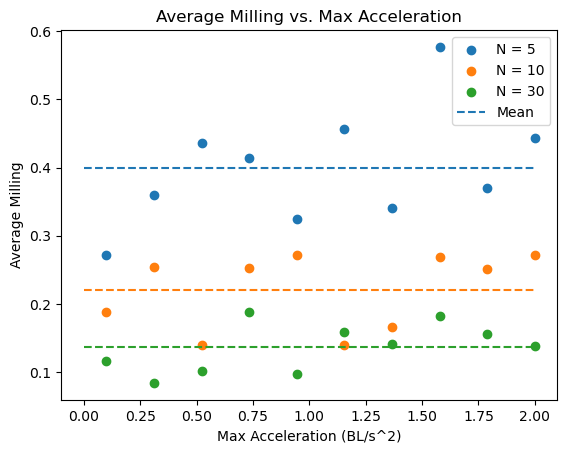

In [ ]:
#plot the  P,C,M vs. max acceleration
#polarization plot
plt.scatter(maxas,MaxAmeanParrays[0], label = 'N = 5')
plt.scatter(maxas,MaxAmeanParrays[1], label = 'N = 10')
plt.scatter(maxas,MaxAmeanParrays[2], label = 'N = 30')
plt.hlines(y = [np.mean(MaxAmeanParrays[0]),np.mean(MaxAmeanParrays[1]),np.mean(MaxAmeanParrays[2])], xmin = 0, xmax = 2.0,  linestyles='--', label='Mean', colors = ['C0', 'C1', 'C2'])
plt.title('Average Polarization vs. Max Acceleration')
plt.xlabel('Max Acceleration (BL/s^2)')
plt.ylabel('Average Polarization')
plt.legend()
plt.show()

#cohesion plot
plt.scatter(maxas,MaxAmeanCarrays[0], label = 'N = 5')
plt.scatter(maxas,MaxAmeanCarrays[1], label = 'N = 10')
plt.scatter(maxas,MaxAmeanCarrays[2], label = 'N = 30')
plt.hlines(y = [np.mean(MaxAmeanCarrays[0]),np.mean(MaxAmeanCarrays[1]),np.mean(MaxAmeanCarrays[2])], xmin = 0, xmax = 2.0,  linestyles='--', label='Mean', colors = ['C0', 'C1', 'C2'])
plt.title('Average Cohesion vs. Max Acceleration')
plt.xlabel('Max Acceleration (BL/s^2)')
plt.ylabel('Average Cohesion')
plt.legend()
plt.show()

#Milling plot
plt.scatter(maxas,MaxAmeanMarrays[0], label = 'N = 5')
plt.scatter(maxas,MaxAmeanMarrays[1], label = 'N = 10')
plt.scatter(maxas,MaxAmeanMarrays[2], label = 'N = 30')
plt.hlines(y = [np.mean(MaxAmeanMarrays[0]),np.mean(MaxAmeanMarrays[1]),np.mean(MaxAmeanMarrays[2])], xmin = 0, xmax = 2.0,  linestyles='--', label='Mean', colors = ['C0', 'C1', 'C2'])
plt.title('Average Milling vs. Max Acceleration')
plt.xlabel('Max Acceleration (BL/s^2)')
plt.ylabel('Average Milling')
plt.legend()
plt.show()

Milling may increase with higher max acceleration, but the effect is small for higher Ns. This coudl be due to the fish bumping into the walls, which causes them to rotate with the wall, increasing their milling. 

### Analyzing the Effect of Density on P,C,M

In [144]:
#Effect of density/number of fish on P,C,M
N = np.linspace(5,50,10, dtype = int)

DmeanParrays = []
DmeanCarrays = []
DmeanMarrays = []

for index in np.arange(len(N)):
    numsim = 10
    totalParray = []
    totalCarray = []
    totalMarray = []
    
    for n in np.arange(numsim):
        numiterations = 1000
        poolrange = 20 #poolrange/2 is the length of each side
        initcoordmax = 10 #essentially initial density
        numfish = N[index]
        inittime = 0

        pos, motorientations, motspeeds, motvelocity = initialize(numfish, initcoordmax)
        
        #run the simulation numiteration times
        for i in np.arange(numiterations):
            pos, motorientations, motspeeds, motvelocity, inittime = updatefish(pos, motorientations, motspeeds, motvelocity, time = inittime, arenarange = poolrange)

        Polarization = findP(motorientations)
        totalParray.append(copy.deepcopy(Polarization))

        Cohesion = findCohesion(pos)
        totalCarray.append(copy.deepcopy(Cohesion))

        Milling = findMilling(pos, motorientations)
        totalMarray.append(copy.deepcopy(Milling))

    DmeanParrays.append(totalParray)
    DmeanCarrays.append(totalCarray)
    DmeanMarrays.append(totalMarray)

In [116]:
#plot the P,C,M vs number of fish/density
N = np.linspace(5,50,10, dtype = int)
densities = N/poolrange**2

#polarization plot
plt.boxplot(DmeanParrays)
plt.title('Average Polarization vs. Number of Fish (Fish Density)')
plt.xticks(ticks=np.arange(1, len(N) + 1), labels=N)
plt.xlabel('N Fish')
plt.ylabel('Average Polarization')
plt.savefig('PolarizationvsN.pdf')
plt.show()

#cohesion plot
plt.boxplot(DmeanCarrays)
plt.title('Average Cohesion vs. Number of Fish (Fish Density)')
plt.xticks(ticks=np.arange(1, len(N) + 1), labels=N)
plt.xlabel('N Fish')
plt.ylabel('Average Cohesion')
plt.savefig('CohesionvsN.pdf')
plt.show()

#Milling plot
plt.boxplot(DmeanMarrays)
plt.title('Average Milling vs. Number of Fish (Fish Density)')
plt.xticks(ticks=np.arange(1, len(N) + 1), labels=N)
plt.xlabel('N Fish')
plt.ylabel('Average Milling')
plt.savefig('MillingvsN.pdf')
plt.show()


NameError: name 'DmeanParrays' is not defined

Last one maybe bias between front and back acceleration because that was hypothesized. So front acceleration has a higher constant than backwards acceleration

### Analyzing the Effect of Forward Alignment Bias

In [253]:
#Do it for N = 5,10,30 to see if anything happens
N = [5,10,30]
#bias back alignment over front, 0 means only consider front alignment, 1 means consider both equally
biases = np.arange(0.0,1.1,0.05)

BmeanParrays = [[],[],[]]
BmeanCarrays = [[],[],[]]
BmeanMarrays = [[],[],[]]

for index in np.arange(len(N)):
    for a in biases: 
        #Run it many times and find the average properties at t = 1000
        numsim = 10
        totalParray = []
        totalCarray = []
        totalMarray = []

        for n in np.arange(numsim):
            numiterations = 1000
            poolrange = 20 #poolrange/2 is the length of each side
            initcoordmax = 10 #essentially initial density
            numfish = N[index]
            inittime = 0

            pos, motorientations, motspeeds, motvelocity = initialize(numfish, initcoordmax)
            
            #run the simulation numiteration times
            for i in np.arange(numiterations):
                pos, motorientations, motspeeds, motvelocity, inittime = updatefish(pos, motorientations, motspeeds, motvelocity, time = inittime, arenarange = poolrange, bias = a)

            Polarization = findP(motorientations)
            totalParray.append(copy.deepcopy(Polarization))

            Cohesion = findCohesion(pos)
            totalCarray.append(copy.deepcopy(Cohesion))

            Milling = findMilling(pos, motorientations)
            totalMarray.append(copy.deepcopy(Milling))
        
        meanP = np.mean(totalParray)
        meanC = np.mean(totalCarray)
        meanM = np.mean(totalMarray)

        BmeanParrays[index].append(meanP)
        BmeanCarrays[index].append(meanC)
        BmeanMarrays[index].append(meanM)

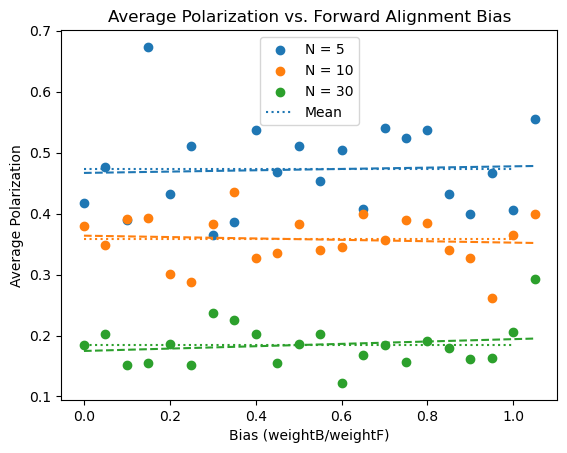

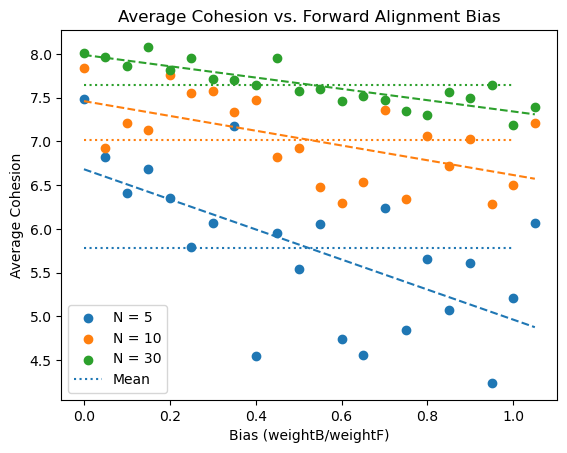

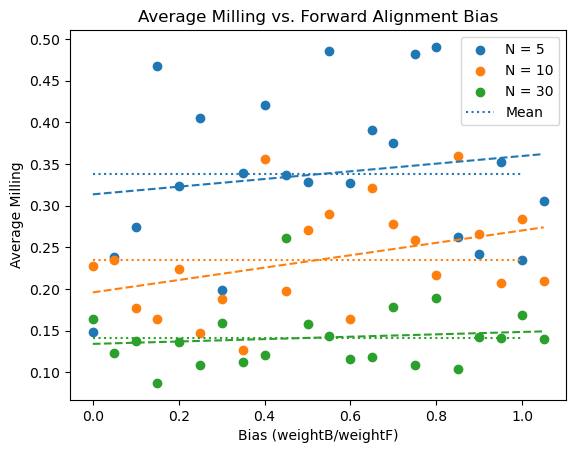

In [267]:
#plot the  P,C,M vs. bias
#polarization plot
c = ['C0', 'C1', 'C2']
for i in np.arange(len(N)):
    plt.scatter(biases,BmeanParrays[i], label = f'N = {N[i]}')
    slope, intercept = np.polyfit(biases, BmeanParrays[i], 1)
    line_y = slope * biases + intercept
    plt.plot(biases, line_y, color = c[i], ls = '--')

plt.hlines(y = [np.mean(BmeanParrays[0]),np.mean(BmeanParrays[1]),np.mean(BmeanParrays[2])], xmin = 0, xmax = 1.0,  linestyles=':', label='Mean', colors = ['C0', 'C1', 'C2'])
plt.title('Average Polarization vs. Forward Alignment Bias')
plt.xlabel('Bias (weightB/weightF)')
plt.ylabel('Average Polarization')
plt.legend()
plt.show()

#cohesion plot
for i in np.arange(len(N)):
    plt.scatter(biases,BmeanCarrays[i], label = f'N = {N[i]}')
    slope, intercept = np.polyfit(biases, BmeanCarrays[i], 1)
    line_y = slope * biases + intercept
    plt.plot(biases, line_y, color = c[i], ls = '--')

plt.hlines(y = [np.mean(BmeanCarrays[0]),np.mean(BmeanCarrays[1]),np.mean(BmeanCarrays[2])], xmin = 0, xmax = 1.0,  linestyles=':', label='Mean', colors = ['C0', 'C1', 'C2'])
plt.title('Average Cohesion vs. Forward Alignment Bias')
plt.xlabel('Bias (weightB/weightF)')
plt.ylabel('Average Cohesion')
plt.legend()
plt.show()

#Milling plot
for i in np.arange(len(N)):
    plt.scatter(biases,BmeanMarrays[i], label = f'N = {N[i]}')
    slope, intercept = np.polyfit(biases, BmeanMarrays[i], 1)
    line_y = slope * biases + intercept
    plt.plot(biases, line_y, color = c[i], ls = '--')

plt.hlines(y = [np.mean(BmeanMarrays[0]),np.mean(BmeanMarrays[1]),np.mean(BmeanMarrays[2])], xmin = 0, xmax = 1.0,  linestyles=':', label='Mean', colors = ['C0', 'C1', 'C2'])
plt.title('Average Milling vs. Forward Alignment Bias')
plt.xlabel('Bias (weightB/weightF)')
plt.ylabel('Average Milling')
plt.legend()
plt.show()

### Analyzing the Effect of Backward Alignment Bias

In [256]:
#Backward bias
N = [5,10,30]
#add more weight to backward alignment
biases = np.arange(0.0,1.1,0.05)

BBmeanParrays = [[],[],[]]
BBmeanCarrays = [[],[],[]]
BBmeanMarrays = [[],[],[]]

for index in np.arange(len(N)):
    for a in biases: 
        #Run it many times and find the average properties at t = 1000
        numsim = 10
        totalParray = []
        totalCarray = []
        totalMarray = []

        for n in np.arange(numsim):
            numiterations = 1000
            poolrange = 20 #poolrange/2 is the length of each side
            initcoordmax = 10 #essentially initial density
            numfish = N[index]
            inittime = 0

            pos, motorientations, motspeeds, motvelocity = initialize(numfish, initcoordmax)
            
            #run the simulation numiteration times
            for i in np.arange(numiterations):
                pos, motorientations, motspeeds, motvelocity, inittime = updatefish(pos, motorientations, motspeeds, motvelocity, time = inittime, arenarange = poolrange, bias = a, forwardbias = False)

            Polarization = findP(motorientations)
            totalParray.append(copy.deepcopy(Polarization))

            Cohesion = findCohesion(pos)
            totalCarray.append(copy.deepcopy(Cohesion))

            Milling = findMilling(pos, motorientations)
            totalMarray.append(copy.deepcopy(Milling))
        
        meanP = np.mean(totalParray)
        meanC = np.mean(totalCarray)
        meanM = np.mean(totalMarray)

        BBmeanParrays[index].append(meanP)
        BBmeanCarrays[index].append(meanC)
        BBmeanMarrays[index].append(meanM)

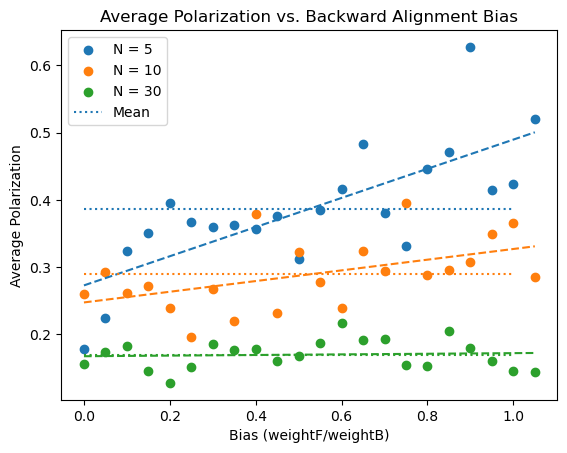

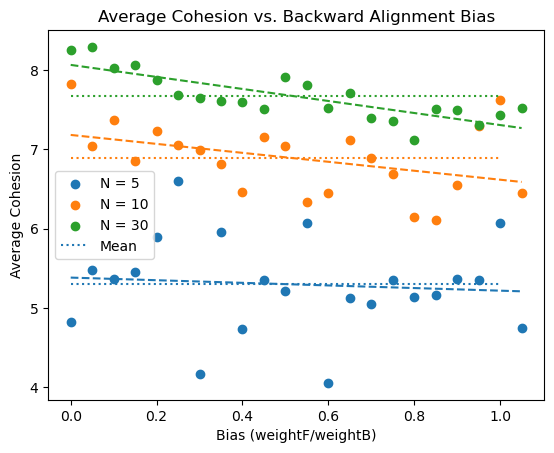

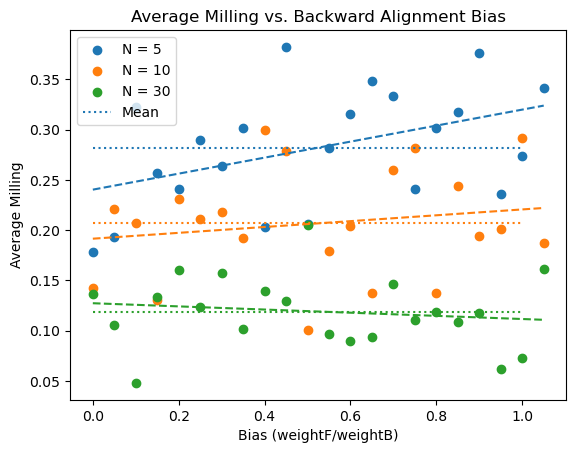

In [266]:
#plot the  P,C,M vs. bias
#polarization plot
c = ['C0', 'C1', 'C2']
for i in np.arange(len(N)):
    plt.scatter(biases,BBmeanParrays[i], label = f'N = {N[i]}')
    slope, intercept = np.polyfit(biases, BBmeanParrays[i], 1)
    line_y = slope * biases + intercept
    plt.plot(biases, line_y, color = c[i], ls = '--')

plt.hlines(y = [np.mean(BBmeanParrays[0]),np.mean(BBmeanParrays[1]),np.mean(BBmeanParrays[2])], xmin = 0, xmax = 1.0,  linestyles=':', label='Mean', colors = ['C0', 'C1', 'C2'])
plt.title('Average Polarization vs. Backward Alignment Bias')
plt.xlabel('Bias (weightF/weightB)')
plt.ylabel('Average Polarization')
plt.legend()
plt.show()

#cohesion plot
for i in np.arange(len(N)):
    plt.scatter(biases,BBmeanCarrays[i], label = f'N = {N[i]}')
    slope, intercept = np.polyfit(biases, BBmeanCarrays[i], 1)
    line_y = slope * biases + intercept
    plt.plot(biases, line_y, color = c[i], ls = '--')

plt.hlines(y = [np.mean(BBmeanCarrays[0]),np.mean(BBmeanCarrays[1]),np.mean(BBmeanCarrays[2])], xmin = 0, xmax = 1.0,  linestyles=':', label='Mean', colors = ['C0', 'C1', 'C2'])
plt.title('Average Cohesion vs. Backward Alignment Bias')
plt.xlabel('Bias (weightF/weightB)')
plt.ylabel('Average Cohesion')
plt.legend()
plt.show()

#Milling plot
for i in np.arange(len(N)):
    plt.scatter(biases,BBmeanMarrays[i], label = f'N = {N[i]}')
    slope, intercept = np.polyfit(biases, BBmeanMarrays[i], 1)
    line_y = slope * biases + intercept
    plt.plot(biases, line_y, color = c[i], ls = '--')
plt.hlines(y = [np.mean(BBmeanMarrays[0]),np.mean(BBmeanMarrays[1]),np.mean(BBmeanMarrays[2])], xmin = 0, xmax = 1.0,  linestyles=':', label='Mean', colors = ['C0', 'C1', 'C2'])
plt.title('Average Milling vs. Backward Alignment Bias')
plt.xlabel('Bias (weightF/weightB)')
plt.ylabel('Average Milling')
plt.legend()
plt.show()